# Capstone Project -Week 02 - FINAL
## IBM Data Science Certificate
# 50 Munich Restaurants from Yelp Business Search Database
# Data Science Analysis

# Week01 -  you will required to submit the following:

## 1. A full report consisting of all of the following components (15 marks):

### 1.1 Introduction - where you discuss the business problem and who would be interested in this project.
### 1.2 Data - where you describe the data that will be used to solve the problem and the source of the data.
See Week 01 - Capstone Project Assignment for Introduction and Data 
### 1.3 Methodology section - which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learning were used and why.
Source code and data visualization of this assignment which covers the methodology section 
### 1.4 Results - section where you discuss the results.
### 1.5 Discussion - section where you discuss any observations you noted and any recommendations you can make based on the results.
### 1.6 Conclusion - section where you conclude the report.
1.4 / 1.5 / 1.6 are all listed at the end of this Jupyter Notebook - following the source code and data visualization of this assignment which covers the methodology section 

## 2. A link to your Notebook on your Github repository pushed showing your code. (15 marks)

## 3. Your choice of a presentation or blogpost. (10 marks)
PDF File - Jupyter Notebook Export of this Report

Here are examples of previous outstanding submissions that should give you an idea of what your report would look like, what your notebook would 
look like in terms of clean, clear, and well-commented code, and what your presentation would look like or your blogpost would look like:

In [2]:
# Import all relevant Python libraries

!pip install -U numpy
!pip install -U pandas
!pip install -U scipy
!pip install -U scikit-learn
!pip install -U imbalanced-learn

import pandas as pd, numpy as np        # pd - for manipulating data, open .csv and .json file/ np - for math operation
import sys, requests, lxml, re, json, urllib # library to handle requests, lxml, json url 
import time

! pip install yelp
! pip install yelpapi		      # install yelp api
               
! pip install matplotlib
import matplotlib.pyplot as plt       # to set graph, figsize
import matplotlib.cm as cm            # for handling utilities in color map
import matplotlib.colors as colors    # to generate colors

from sklearn.cluster import KMeans    # for generating cluster

!pip install beautifulsoup4
from bs4 import BeautifulSoup		# for scapping wikipedia wesite

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install seaborn
import seaborn as sns

! pip install plotly 
! pip install chart_studio
! pip install plotly --upgrade
import chart_studio
# chart_studio.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')

import plotly
import chart_studio.plotly as py
# plotly.tools.set_credentials_file(username='', api_key='')
import plotly.tools as tls
from plotly.graph_objs import *
%matplotlib inline

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

!pip install geopy
from geopy.geocoders import Nominatim 	# module to convert an address into latitude and longitude values

! pip install folium==0.12.0
import folium 				# generating maps 

! pip install glom
from glom import glom # library that allows us to use . notation to access property from a deeply nested object

Requirement already up-to-date: numpy in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (1.19.5)
Requirement already up-to-date: pandas in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (1.1.5)
Requirement already up-to-date: scipy in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (1.5.4)
Requirement already up-to-date: scikit-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.24.2)
Requirement already up-to-date: imbalanced-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.8.0)
Requirement already up-to-date: plotly in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (5.1.0)
     |████████████████████████████████| 102kB 24.8MB/s ta 0:00:01
  Found existing installation: folium 0.5.0
    Uninstalling folium-0.5.0:
      Successfully uninstalled folium-0.5.0


In [3]:
# define yelp api key, authorization data
api_key='FM3e75vT6xALNvy1nHL8CkmZCTNuVd6s6bGyj47L_IHcLkmqjxk4xQ3yEToUkfC8uzwC-35U6e3VsPaE0hZu__dVpr1xJ1jc54KeB4DadFFPwS3X80VGA5ZLXZj1YHYx'
headers = {'Authorization': 'Bearer %s' % api_key}

url='https://api.yelp.com/v3/businesses/search'

# yelp api, businesses search - params, specifies relevant parameters - term, location, limit
# params term - restaurant, bars, cafes, italian, japan, china, location city, limit 5, 10, 20 max 50 
# limit is 50 restaurant entries, specified by yelp api
params = {'term':'restaurant','location':'Munich', 'limit':'50'}

# Making a get request to the API
req=requests.get(url, params=params, headers=headers)

# data json parsing
data = json.loads(req.text)


# proceed only if the status code is 200
print('Proceed only if the Request Object status code is 200', '\n')
print('The Request Object status code is {}'.format(req.status_code), '\n')
print('Data Type Request Object', '\n')
print(type(req), '\n') # print Data Type Request Object 
print('Data Type TEXT Request Object - STRING', '\n')
print(type(req.text), '\n') # printing text from req response 
print('Data Type JSON Request Object- METHOD', '\n')
print(type(req.json), '\n') # printing json from req response 
print('Data Type JSON parsing Request Object- DICTIONARY', '\n')
print(type(data),  '\n')


Proceed only if the Request Object status code is 200 

The Request Object status code is 200 

Data Type Request Object 

<class 'requests.models.Response'> 

Data Type TEXT Request Object - STRING 

<class 'str'> 

Data Type JSON Request Object- METHOD 

<class 'method'> 

Data Type JSON parsing Request Object- DICTIONARY 

<class 'dict'> 



In [4]:
# declare panda datframe, parse request object to json - businesses is data input from yelp api
df2 = pd.DataFrame.from_dict(req.json()['businesses'])

# display dimension, column names and column types for df2
print(len(df2), '\n') #Print how many rows
print(df2.columns, '\n') #Print column names
print(df2.dtypes, '\n') #Print column types

# Display df2 - notice columns are multi nested and unsorted
df2.head()

50 

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object') 

id                object
alias             object
name              object
image_url         object
is_closed           bool
url               object
review_count       int64
categories        object
rating           float64
coordinates       object
transactions      object
price             object
location          object
phone             object
display_phone     object
distance         float64
dtype: object 



,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,njLmw1IVbtOb2m-4TNr8ow,augustiner-keller-münchen-2,Augustiner-Keller,https://s3-media3.fl.yelpcdn.com/bphoto/5VtnFb...,False,https://www.yelp.com/biz/augustiner-keller-m%C...,633,"[{'alias': 'bavarian', 'title': 'Bavarian'}, {...",4.0,"{'latitude': 48.1435, 'longitude': 11.55195}",[],€€,"{'address1': 'Arnulfstr. 52', 'address2': None...",+4989594393,+49 89 594393,1440.274028
1,SbJxG5IbPsbzGcBl8ZL8uA,marbella-münchen,Marbella,https://s3-media2.fl.yelpcdn.com/bphoto/JwNNsG...,False,https://www.yelp.com/biz/marbella-m%C3%BCnchen...,38,"[{'alias': 'spanish', 'title': 'Spanish'}, {'a...",4.5,"{'latitude': 48.1538833, 'longitude': 11.5416787}",[],€€,"{'address1': 'Horemansstr. 30', 'address2': ''...",+498912779753,+49 89 12779753,129.674074
2,1b1SH21SQt_rY92gEZDKEg,neuhauser-augustiner-münchen,Neuhauser Augustiner,https://s3-media3.fl.yelpcdn.com/bphoto/zGP5G0...,False,https://www.yelp.com/biz/neuhauser-augustiner-...,36,"[{'alias': 'german', 'title': 'German'}]",4.5,"{'latitude': 48.1592, 'longitude': 11.5406}",[],€€,"{'address1': 'Hübnerstr. 23', 'address2': None...",+49891202130,+49 89 1202130,497.766512
3,oNF_jG_WQP0WZ7BBZ-ylXg,yee-chino-restaurant-münchen,Yee Chino Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/x9Y7Bk...,False,https://www.yelp.com/biz/yee-chino-restaurant-...,49,"[{'alias': 'panasian', 'title': 'Pan Asian'}]",4.5,"{'latitude': 48.1632208, 'longitude': 11.5436741}",[],€€,"{'address1': 'Helene-Weber-Allee 19', 'address...",+498915988587,+49 89 15988587,928.266080
4,wOxHVpGYaqeXgrVLOgaAPQ,an-an-münchen,An An,https://s3-media2.fl.yelpcdn.com/bphoto/_ILb2u...,False,https://www.yelp.com/biz/an-an-m%C3%BCnchen?ad...,12,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}]",5.0,"{'latitude': 48.14902, 'longitude': 11.5429}",[],NaN,"{'address1': 'Elvirastr. 12', 'address2': None...",+498955286459,+49 89 55286459,654.180864


In [72]:
# normalize json to new dataframe - d1
d1 = pd.json_normalize(data["businesses"]) 
# d2 dataframe, with appropriate column names, json subcolumns coordinates.latitude / coordinates.longitude / location.display_address
d2 = d1[['name','location.display_address','phone', 'categories', 'rating', 'review_count', 'coordinates.latitude','coordinates.longitude', 'price']]
# rename columns
d2.rename({'location.display_address': 'address', 'coordinates.latitude': 'latitude',
         'coordinates.longitude': 'longitude'}, axis=1, inplace=True)
# maximize column width to display appropriately nested json data in column - categories
pd.set_option("display.max_colwidth", -1)

d2.head()



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,name,address,phone,categories,rating,review_count,latitude,longitude,price
0,Augustiner-Keller,"[Arnulfstr. 52, 80335 Munich, Germany]",+4989594393,"[{'alias': 'bavarian', 'title': 'Bavarian'}, {'alias': 'beergarden', 'title': 'Beer Garden'}]",4.0,633,48.143500,11.551950,€€
1,Marbella,"[Horemansstr. 30, 80636 Munich, Germany]",+498912779753,"[{'alias': 'spanish', 'title': 'Spanish'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]",4.5,38,48.153883,11.541679,€€
2,Neuhauser Augustiner,"[Hübnerstr. 23, 80637 Munich, Germany]",+49891202130,"[{'alias': 'german', 'title': 'German'}]",4.5,36,48.159200,11.540600,€€
3,Yee Chino Restaurant,"[Helene-Weber-Allee 19, 80637 Munich, Germany]",+498915988587,"[{'alias': 'panasian', 'title': 'Pan Asian'}]",4.5,49,48.163221,11.543674,€€
4,An An,"[Elvirastr. 12, 80636 Munich, Germany]",+498955286459,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}]",5.0,12,48.149020,11.542900,NaN


In [74]:
# categories column, contains nested json data - we need to extract that and separate it to new columns
# d3 new df that contains only categories column 
d3 = d2
d3['cat'] = d2['categories']

# notice nested json data in categories column - which hasn't been normalized/flattened by previous json normailization 
# print(d3.columns, '\n')
d3.head()



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,address,phone,categories,rating,review_count,latitude,longitude,price,cat
0,Augustiner-Keller,"[Arnulfstr. 52, 80335 Munich, Germany]",+4989594393,"[{'alias': 'bavarian', 'title': 'Bavarian'}, {'alias': 'beergarden', 'title': 'Beer Garden'}]",4.0,633,48.143500,11.551950,€€,"[{'alias': 'bavarian', 'title': 'Bavarian'}, {'alias': 'beergarden', 'title': 'Beer Garden'}]"
1,Marbella,"[Horemansstr. 30, 80636 Munich, Germany]",+498912779753,"[{'alias': 'spanish', 'title': 'Spanish'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]",4.5,38,48.153883,11.541679,€€,"[{'alias': 'spanish', 'title': 'Spanish'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]"
2,Neuhauser Augustiner,"[Hübnerstr. 23, 80637 Munich, Germany]",+49891202130,"[{'alias': 'german', 'title': 'German'}]",4.5,36,48.159200,11.540600,€€,"[{'alias': 'german', 'title': 'German'}]"
3,Yee Chino Restaurant,"[Helene-Weber-Allee 19, 80637 Munich, Germany]",+498915988587,"[{'alias': 'panasian', 'title': 'Pan Asian'}]",4.5,49,48.163221,11.543674,€€,"[{'alias': 'panasian', 'title': 'Pan Asian'}]"
4,An An,"[Elvirastr. 12, 80636 Munich, Germany]",+498955286459,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}]",5.0,12,48.149020,11.542900,NaN,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}]"


In [75]:
# flatten categories/cat column - declare new column al1, al2, al3 that contain separated nested categories data 
df1 = (
    pd.DataFrame(d3["cat"]
    .apply(pd.Series))
)
# name df1 columns
df1.columns = ['al1', 'al2', 'al3']

# check df1 dimension - 50 throughout this assignment - remember limit 50 - yelp api
print(len(df1), '\n') #Print how many rows
print(df1.columns, '\n') #Print column names
print(df1.dtypes, '\n') #Print column types

# we have for df1, categories with same terms but also different - still nested data in columns
df1.head(10)


50 

Index(['al1', 'al2', 'al3'], dtype='object') 

al1    object
al2    object
al3    object
dtype: object 



,al1,al2,al3
0,"{'alias': 'bavarian', 'title': 'Bavarian'}","{'alias': 'beergarden', 'title': 'Beer Garden'}",NaN
1,"{'alias': 'spanish', 'title': 'Spanish'}","{'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}",NaN
2,"{'alias': 'german', 'title': 'German'}",NaN,NaN
3,"{'alias': 'panasian', 'title': 'Pan Asian'}",NaN,NaN
4,"{'alias': 'vietnamese', 'title': 'Vietnamese'}",NaN,NaN
5,"{'alias': 'mexican', 'title': 'Mexican'}","{'alias': 'cocktailbars', 'title': 'Cocktail Bars'}",NaN
6,"{'alias': 'thai', 'title': 'Thai'}",NaN,NaN
7,"{'alias': 'italian', 'title': 'Italian'}",NaN,NaN
8,"{'alias': 'vietnamese', 'title': 'Vietnamese'}","{'alias': 'wok', 'title': 'Wok'}",NaN
9,"{'alias': 'italian', 'title': 'Italian'}",NaN,NaN


In [8]:
# json flattening dataframe columns, al1, al2, al3 - new columns with nested data
json_struct = json.loads(df1.to_json(orient="records"))    
df_flat = pd.json_normalize(json_struct) #use pd.io.json
# df1.head()
print(len(df_flat), '\n') # Print how many rows, check dimension 50
# display categories dataframe, notice similarites and differences, so entry0 Bavarian/Beergarden, entry1 Spanish/Tapas, entry2 Panasian...
df_flat.head(3)


50 



,al3,al1.alias,al1.title,al2.alias,al2.title,al2,al3.alias,al3.title
0,NaN,bavarian,Bavarian,beergarden,Beer Garden,NaN,NaN,NaN
1,NaN,spanish,Spanish,tapasmallplates,Tapas/Small Plates,NaN,NaN,NaN
2,NaN,german,German,NaN,NaN,NaN,NaN,NaN


In [9]:

# al1.title, al2.title -  columns with relevant data
df_flat2 = df_flat[['al1.title', 'al2.title', 'al3.title']]
# cat1, cat2, cat3 - 3 distinct categories to describe restaurants - mainly nationality and style
# rename to cat 1, cat2
df_flat2.columns = ['cat1', 'cat2', 'cat3']
df_flat2.insert(0, 'catflag', df_flat2.index + 0)


# catflag - new column with multiple conditions - to uniqly categroize restaurants - 
conditions = [
    (df_flat2['cat1'] == 'Spanish'),
    (df_flat2['cat1'] == 'Bavarian'),
    (df_flat2['cat1'] == 'Pan Asian'),
    (df_flat2['cat2'] == 'Vietnamese')]
choices = ['Continental', 'Continental', 'Continental', 'Asian']
df_flat2['catflag'] = np.select(conditions, choices, default='Conditional Value 1')

df_flat2.head(2)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,catflag,cat1,cat2,cat3
0,Continental,Bavarian,Beer Garden,NaN
1,Continental,Spanish,Tapas/Small Plates,NaN


In [94]:

# merge d2 with df_flat2
dff = pd.concat([d2, df_flat2], axis=1)
dff1 = dff[['cat1', 'cat2', 'cat3']]

count1 = dff1['cat1'].value_counts()
count2 = dff1['cat2'].value_counts()
count3 = dff1['cat3'].value_counts()

# check column df_flat2 size 50 matches  
print('Number of Rows df', '\n')
print(len(df_flat2), '\n')

# Frequency of occurencies for cat1, cat2, cat3 - Categories Restaurants
# cat1 is nationality, cat2 is style, cat3 is type
print('Freq of occurencies cat1', '\n')
print(count1, '\n')
print('Freq of occurencies cat2', '\n')
print(count2, '\n')
print('Freq of occurencies cat3', '\n')
print(count3)

dff.head()

Number of Rows df 

50 

Freq of occurencies cat1 

Italian               7
Bavarian              5
German                4
Greek                 4
Cafes                 4
Chinese               3
Vietnamese            3
Pan Asian             3
Barbeque              2
Thai                  2
Mexican               2
Cocktail Bars         1
Kebab                 1
Pancakes              1
Korean                1
Tapas Bars            1
Breakfast & Brunch    1
International         1
Vegan                 1
Ramen                 1
Spanish               1
Austrian              1
Name: cat1, dtype: int64 

Freq of occurencies cat2 

American (Traditional)    2
Steakhouses               2
Breakfast & Brunch        2
Dive Bars                 1
Cocktail Bars             1
Mediterranean             1
Tapas/Small Plates        1
Seafood                   1
Bavarian                  1
Brewpubs                  1
Wok                       1
Beer Garden               1
Smokehouse                1
Ca

,name,address,phone,categories,rating,review_count,latitude,longitude,price,cat,catflag,cat1,cat2,cat3
0,Augustiner-Keller,"[Arnulfstr. 52, 80335 Munich, Germany]",+4989594393,"[{'alias': 'bavarian', 'title': 'Bavarian'}, {'alias': 'beergarden', 'title': 'Beer Garden'}]",4.0,633,48.143500,11.551950,€€,"[{'alias': 'bavarian', 'title': 'Bavarian'}, {'alias': 'beergarden', 'title': 'Beer Garden'}]",Continental,Bavarian,Beer Garden,NaN
1,Marbella,"[Horemansstr. 30, 80636 Munich, Germany]",+498912779753,"[{'alias': 'spanish', 'title': 'Spanish'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]",4.5,38,48.153883,11.541679,€€,"[{'alias': 'spanish', 'title': 'Spanish'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]",Continental,Spanish,Tapas/Small Plates,NaN
2,Neuhauser Augustiner,"[Hübnerstr. 23, 80637 Munich, Germany]",+49891202130,"[{'alias': 'german', 'title': 'German'}]",4.5,36,48.159200,11.540600,€€,"[{'alias': 'german', 'title': 'German'}]",Conditional Value 1,German,NaN,NaN
3,Yee Chino Restaurant,"[Helene-Weber-Allee 19, 80637 Munich, Germany]",+498915988587,"[{'alias': 'panasian', 'title': 'Pan Asian'}]",4.5,49,48.163221,11.543674,€€,"[{'alias': 'panasian', 'title': 'Pan Asian'}]",Continental,Pan Asian,NaN,NaN
4,An An,"[Elvirastr. 12, 80636 Munich, Germany]",+498955286459,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}]",5.0,12,48.149020,11.542900,NaN,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}]",Conditional Value 1,Vietnamese,NaN,NaN


In [95]:
# dff is the final dataframe containing all relevant required columns to work with data science tools 
# drop categories column, to classify Munich Restaurants using appropriate Python Data Science Tools 
dff.drop('categories', inplace=True, axis=1)
dff.drop('cat', inplace=True, axis=1)
# insert incremental identifier column for data science tools - used later for plotting data
dff.insert(0, 'ID', dff.index + 0)

# Replace NaN entries with empty spaces
dff = dff.fillna('')
# Sort dff Alphabetically - Column Name - Display all dff
dff.sort_values(by=['name'], ascending=True)

,ID,name,address,phone,rating,review_count,latitude,longitude,price,catflag,cat1,cat2,cat3
17,17,AMIGOS RESTAURANTE,"[Dachauer Str. 153, 80335 Munich, Germany]",+498918985117,5.0,2,48.153812,11.553989,,Conditional Value 1,Mexican,American (Traditional),
36,36,AOI,"[Volkartstr. 22, 80634 Munich, Germany]",+498918008880,4.0,5,48.155570,11.534390,,Conditional Value 1,Ramen,,
20,20,Al Paladino,"[Heimeranplatz 1, 80999 Munich, Germany]",+49895025657,4.5,73,48.133400,11.534600,€€,Conditional Value 1,Italian,,
4,4,An An,"[Elvirastr. 12, 80636 Munich, Germany]",+498955286459,5.0,12,48.149020,11.542900,,Conditional Value 1,Vietnamese,,
11,11,Asia Imbiss Feinkost,"[Leonrodstr. 67, 80636 Munich, Germany]",+49891292705,5.0,4,48.157940,11.543960,,Continental,Pan Asian,,
10,10,Augustiner Bräustuben,"[Landsberger Str. 19, 80339 Munich, Germany]",+4989507047,4.0,417,48.139120,11.545660,€€,Conditional Value 1,German,Bavarian,Gastropubs
0,0,Augustiner-Keller,"[Arnulfstr. 52, 80335 Munich, Germany]",+4989594393,4.0,633,48.143500,11.551950,€€,Continental,Bavarian,Beer Garden,
21,21,Café Gollier,"[Gollierstr. 36, 80339 Munich, Germany]",+498920188886,5.0,8,48.135810,11.540820,€,Conditional Value 1,Cafes,Breakfast & Brunch,
27,27,California Bean,"[Dachauer Str. 12, 80335 Munich, Germany]",+498955264422,4.5,140,48.142893,11.560298,€€,Conditional Value 1,Cafes,American (Traditional),Breakfast & Brunch
25,25,Drunken Cow Bar & Grill,"[Gabelsbergerstr. 58, 80333 Munich, Germany]",+498954356230,4.0,24,48.149750,11.560920,€€€,Conditional Value 1,Cocktail Bars,Steakhouses,Burgers


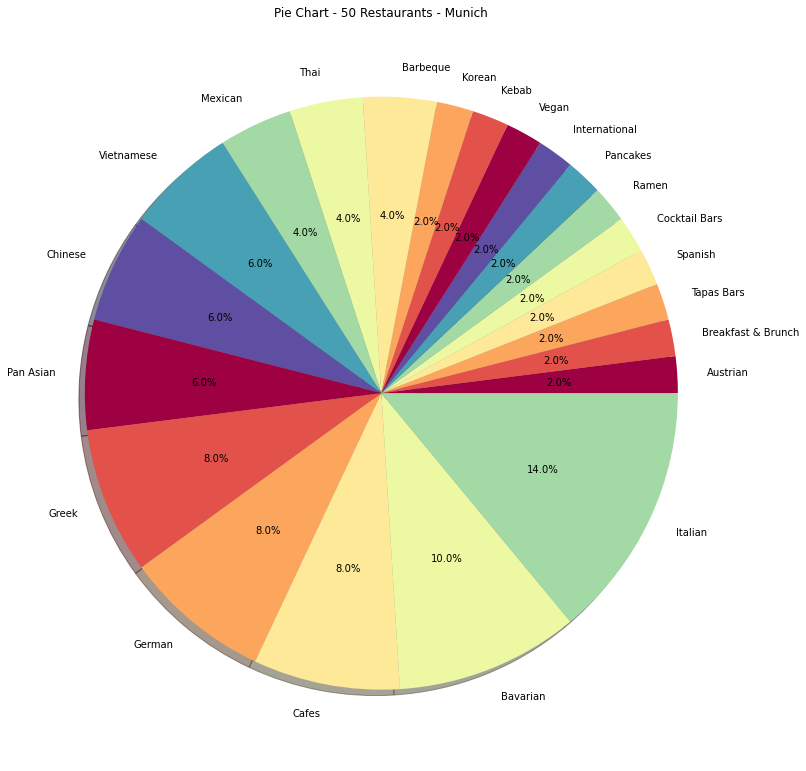

In [97]:
# pie chart
# import libraries
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

from collections import Counter

# declare categories column
my_cat1 =dff['cat1']

title_type = dff.groupby('cat1').agg('count')

# Pie Chart - matplotlib
type_labels = title_type.ID.sort_values().index 
type_counts = title_type.ID.sort_values()
plt.figure(1, figsize=(50,30)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(the_grid[0, 1], aspect=1, title='Pie Chart - 50 Restaurants - Munich')
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()



Rating values are 
 4.5    0.64
4.0    0.28
5.0    0.08
Name: rating, dtype: float64


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 14., 32.,  4.]),
 array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <BarContainer object of 10 artists>)

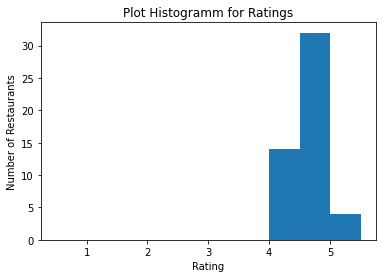

In [104]:
# histogram graph to diplay Rating vs Nr of Restaurants
rat1 = dff['rating'] 

# Rating Percentages
# Rating Values 4,5 (64%) - 4,0 (28%) - 5,0 (8%)
print('Rating values are', '\n', rat1.value_counts(normalize=True))

plt.title("Plot Histogramm for Ratings")
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')

plt.hist(rat1, range=(0.5, 5.5), bins=10)


In [106]:
# dff1.head()
df_flat4=dff1
# df_flat4.head()
dff2=dff
dff1.head(10)

,cat1,cat2,cat3
0,Bavarian,Beer Garden,NaN
1,Spanish,Tapas/Small Plates,NaN
2,German,NaN,NaN
3,Pan Asian,NaN,NaN
4,Vietnamese,NaN,NaN
5,Mexican,Cocktail Bars,NaN
6,Thai,NaN,NaN
7,Italian,NaN,NaN
8,Vietnamese,Wok,NaN
9,Italian,NaN,NaN


In [124]:

# Extract from dff1 - cat 1/2/3 Columns all relevant categroisation information
df_flat4['fl1'] = dff1.cat1.str.extract(r'\b(\w+)$', expand=True)
df_flat4['fl2'] = dff1.cat2.str.extract(r'\b(\w+)$', expand=True)
df_flat4['fl3'] = dff1.cat3.str.extract(r'\b(\w+)$', expand=True)
df_flat4 = dff1.fillna('')


# New CAT Column to store all previously extracted - relevant categroisation information
df_flat4['CAT'] = df_flat4['cat1'] +' - '+ df_flat4['cat2']+' - '+ df_flat4['cat3']
df_flat4.head(50)



,cat1,cat2,cat3,fl1,fl2,fl3,CAT
0,Bavarian,Beer Garden,,Bavarian,Garden,,Bavarian - Beer Garden -
1,Spanish,Tapas/Small Plates,,Spanish,Plates,,Spanish - Tapas/Small Plates -
2,German,,,German,,,German - -
3,Pan Asian,,,Asian,,,Pan Asian - -
4,Vietnamese,,,Vietnamese,,,Vietnamese - -
5,Mexican,Cocktail Bars,,Mexican,Bars,,Mexican - Cocktail Bars -
6,Thai,,,Thai,,,Thai - -
7,Italian,,,Italian,,,Italian - -
8,Vietnamese,Wok,,Vietnamese,Wok,,Vietnamese - Wok -
9,Italian,,,Italian,,,Italian - -


In [125]:
C1=df_flat4['CAT']
# Assign C1 - to category column - which now contains all categorization paramters
dff2['category']= C1
# dff2.drop(['price', 'catflag', 'cat1','cat2', 'cat3'], axis=1, inplace=True)
# Sort dff Alphabetically - Column Name
dff2.sort_values(by=['name'], ascending=True)
dff2.head()

,ID,name,address,phone,rating,review_count,latitude,longitude,price,catflag,cat1,cat2,cat3,category
0,0,Augustiner-Keller,"[Arnulfstr. 52, 80335 Munich, Germany]",+4989594393,4.0,633,48.143500,11.551950,€€,Continental,Bavarian,Beer Garden,,Bavarian - Beer Garden -
1,1,Marbella,"[Horemansstr. 30, 80636 Munich, Germany]",+498912779753,4.5,38,48.153883,11.541679,€€,Continental,Spanish,Tapas/Small Plates,,Spanish - Tapas/Small Plates -
2,2,Neuhauser Augustiner,"[Hübnerstr. 23, 80637 Munich, Germany]",+49891202130,4.5,36,48.159200,11.540600,€€,Conditional Value 1,German,,,German - -
3,3,Yee Chino Restaurant,"[Helene-Weber-Allee 19, 80637 Munich, Germany]",+498915988587,4.5,49,48.163221,11.543674,€€,Continental,Pan Asian,,,Pan Asian - -
4,4,An An,"[Elvirastr. 12, 80636 Munich, Germany]",+498955286459,5.0,12,48.149020,11.542900,,Conditional Value 1,Vietnamese,,,Vietnamese - -


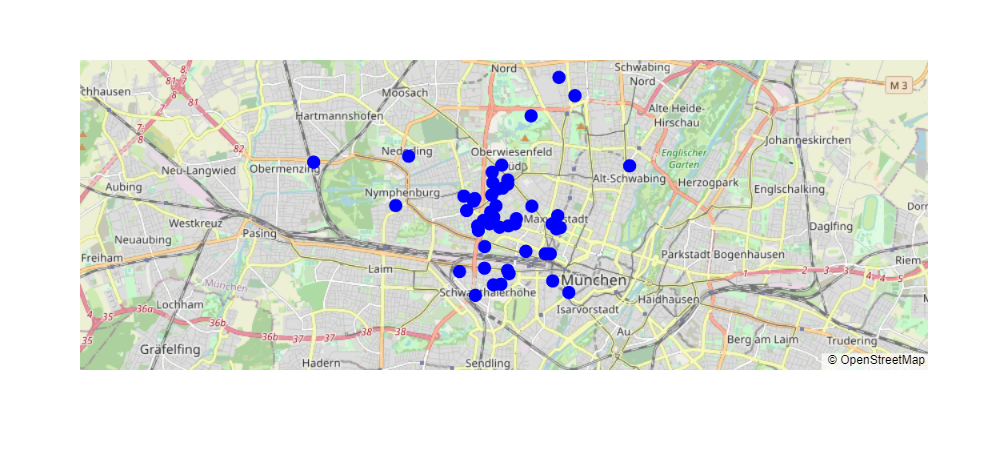

In [126]:
# Create interactive plotly express map to display 50 restaurants in Munich, with following data:
# name lat, long, address, category, review count

import plotly.express as px
fig = px.scatter_mapbox(dff2, lat="latitude", lon="longitude", 
                        hover_name='name', hover_data=['address', 'category', 'review_count'], zoom=11, size_max=40)
fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(marker=dict(size=14, color='blue'))
fig.show()

### 1.4 Results - We have various Results for 50 Restaurants in Munich  
Results are visualized using Pie Chart, Interactive Map and Histogram for Rating - The Pie Chart visualizes categories with relevant percentages. Interactive Maps using the Plotly library/ StreetMap displays Restaurant information in the Popup Menu (Name, Address, Coordinates, Category...) it also displays location in the city Map, this is useful to asses where the might be demand for a particular Restaurant category. 
Histogram Rating - displays that there are no ratings below 4,0 - most of them are 4,5 (64%), followed by 4,0 (28%) and 5,0 (8%)
### 1.5 Discussion - section where you discuss any observations you noted and any recommendations you can make based on the results.
The Data Science analysis in this project has given us an insight for 50 Restaurants in Munich - covering Data Requirements, Collection Preparation and later Data Understanding - looking at the Pie Chart above in the Notebook, we can estimate that there is room for more Vegan/Vegeterian, Thai, Tapas, International, Latin American, Austrian, Pan-Asian, Vietnamese and Chinese Restaurants.
The interactive Map displays a centered distribution of the Restaurants, there should be more demand for international cuisine in the suburbs East/West/North/South.
### 1.6 Conclusion - section where you conclude the report.
This assignment gives a complete overview over the Data Science Methodology - Business Understanding, Analytic Approach initially. After that the "Data Chain" is evaluated: Data Requirements, Collection, Understanding and Data Preparation is assessed and implemented. Here we have Software Engineering constraints and limitations that depend on the various projects and technologies. In this assignment I chose to work with the Yelp API, its limitation of 50 Search Results is obviously a constraint for this project, but it was chosen also to limit the length of this assignment.
But, we have access with Python and its libraries to excellent Data Science Tools, for visualization, evaluation end estimation.
Another API with more search results could improve data science evaluation quality and accuracy. Obviously more analysis, CPU Power and Memory and data processing should be applied.
